## Gold price prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
#Loading the dataframe from the CSV data file.
dataset = pd.read_csv("D:\python data for pract\gld_price_data.csv")

#Viewing the first 5 data rows to get a better idea of the dataset.
dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


### exploring data set

In [3]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [4]:
print(dataset.shape)

(2290, 6)


In [5]:
dataset.isnull().sum().sum()


0

In [6]:
duplicate_rows = dataset[dataset.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (0, 6)


### corelation analysis

<AxesSubplot:>

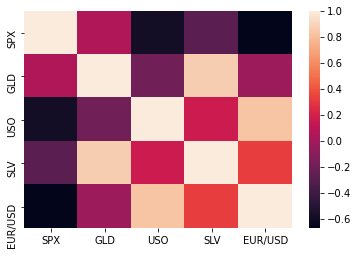

In [7]:
sns.heatmap(dataset.corr())

In [8]:
correlation = dataset.corr()

<AxesSubplot:>

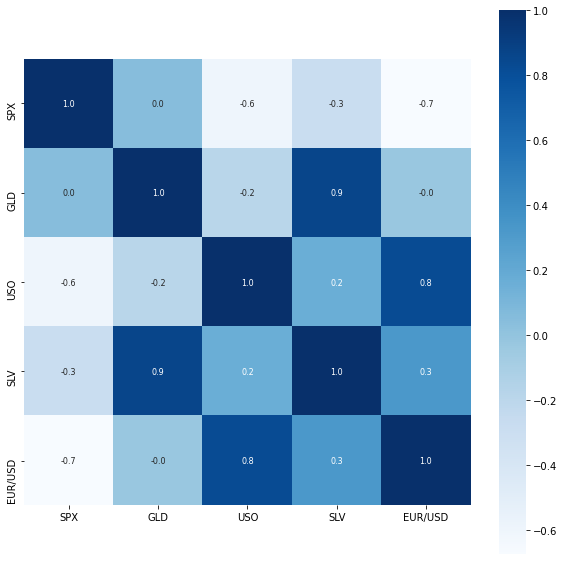

In [9]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square=True, fmt= '.1f', annot=True, annot_kws= {'size': 8}, cmap = 'Blues')

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Gold Price'),
 Text(0.5, 1.0, 'Gold Price over months')]

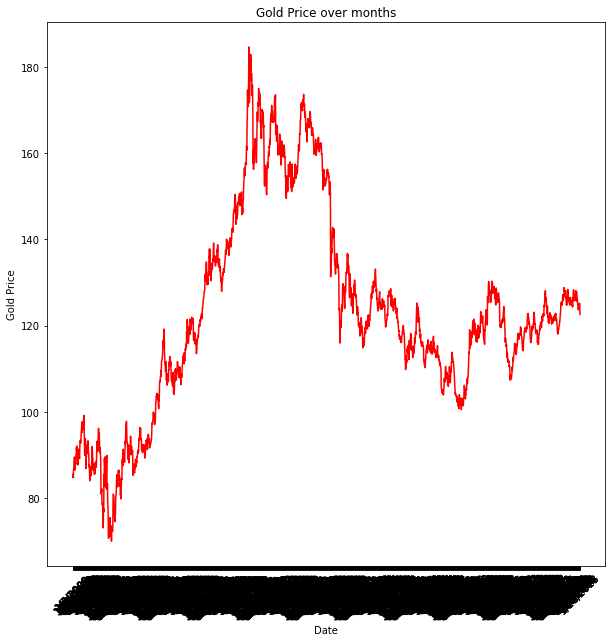

In [10]:
fig, ax = plt.subplots(figsize = (10,10))

# add the x-axis and the y-axis to the plot
ax.plot(dataset['Date'], 
        dataset['GLD'], 
        color = 'red')

# rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45)

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Gold Price",
       title="Gold Price over months")

### gold price over months

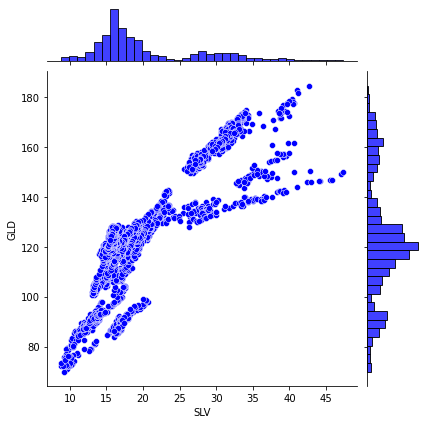

In [14]:
sns.jointplot(x =dataset['SLV'], y = dataset['GLD'], color = 'blue')

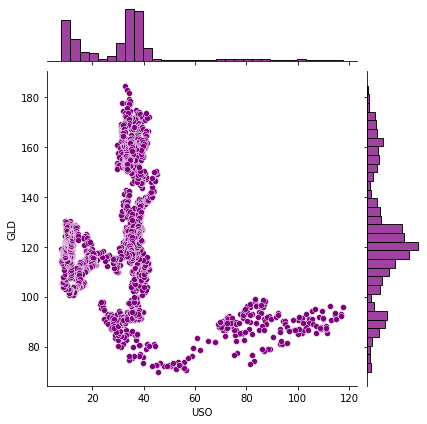

In [12]:
sns.jointplot(x =dataset['USO'], y = dataset['GLD'], color = 'purple')

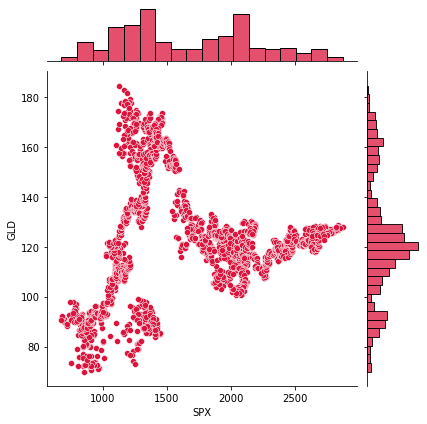

In [13]:
sns.jointplot(x =dataset['SPX'], y = dataset['GLD'], color = 'crimson')


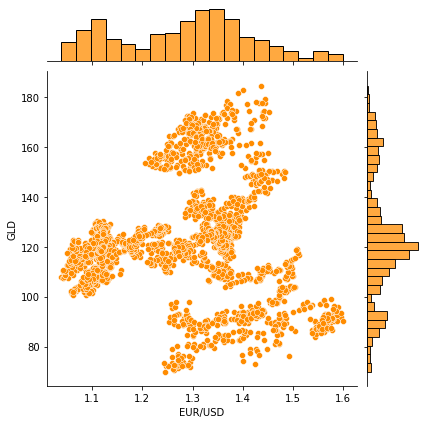

In [15]:
sns.jointplot(x =dataset['EUR/USD'], y = dataset['GLD'], color = 'darkorange')

### Checking the density of our target variable GLD

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

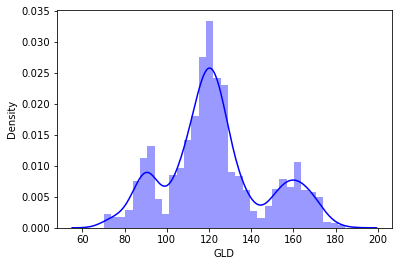

In [16]:
sns.distplot(dataset['GLD'], color = 'blue')

In [17]:
#Extracting the Dependent and Independent Variables
x = dataset.drop(['Date', 'GLD'], axis=1)
y = dataset['GLD']

In [18]:
#Splitting the dataset into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(1832, 4) (458, 4)


In [19]:
def fit_predict(model1):
    model = model1
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    print('RSS: ', metrics.r2_score(y_test, y_predict))
    print('MAE :', metrics.mean_absolute_error(y_test, y_predict))
    plt.scatter(y_test, y_predict)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Price of Gold')
    plt.show()
    plt.scatter(y_test, y_predict, c='crimson')
    p1 = max(max(y_predict), max(y_train))
    p2 = min(min(y_predict), min(y_train))
    plt.plot([p1,p2], [p1,p2], 'b-')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Price')
    plt.show()

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [21]:

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [22]:
training_data_prediction = model.predict(x_train)

In [23]:
testing_data_prediction = model.predict(x_test)

In [24]:
R_square_score = metrics.r2_score(y_train, training_data_prediction)
Mean_absolute_error = metrics.mean_absolute_error(y_train, training_data_prediction)
print("R_squared_error :", R_square_score)
print('Mean absolute_error :',Mean_absolute_error)

R_squared_error : 0.8771892526181604
Mean absolute_error : 6.118035850691067


### XGBoost Regression

RSS:  0.9892674649325068
MAE : 1.2477577634279473


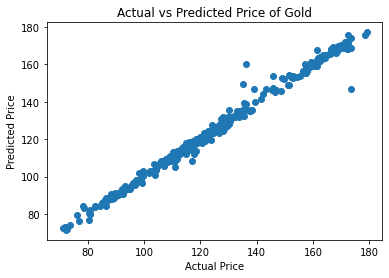

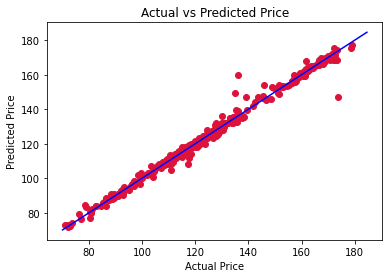

In [25]:
from sklearn.ensemble import RandomForestRegressor
fit_predict(RandomForestRegressor(n_estimators = 100, random_state = 0))

In [26]:
from xgboost import XGBRegressor
fit_predict(XGBRegressor())

ModuleNotFoundError: No module named 'xgboost'

In [27]:
model = XGBRegressor()                                    # using XGB to make predictions for our test case
model.fit(x_train, y_train)

NameError: name 'XGBRegressor' is not defined

#### creating a test case

In [28]:
input = x[18:19]
actual_charges = y[18:19]
print(input)

            SPX        USO     SLV   EUR/USD
18  1362.300049  72.980003  16.534  1.477192


In [29]:
print("actual charges: ",actual_charges)

actual charges:  18    91.150002
Name: GLD, dtype: float64


In [30]:

predicted_charges = model.predict(input)

In [31]:
print("predicted_charges: ",predicted_charges)

predicted_charges:  [97.24431634]
